# 0. 분석 목표

1. 계절별 매출액  
=>각 계절마다 매출액이 높은 업종을 찾기   

2. 음식점 총 매출액에서 한식, 양식, 중식의 매출액 비교    
=>제주도에서 어떤 음식점이 강세인지 파악하기.  

3. 시별 총 매출액  
=> 어떤 시에서 매출액이 많이 나오는지 파악하기  
=> 이후, 매출액이 왜 많이 나오는지 파악  
	ㄴ> 이때 유동인구 기반해서 파악해보기 (ex.거주인구 너 때문? 근무인구 너 때문? 방문인구 너야?)  
=> 어떤 업종이 시의 매출액에 많은 기여를 했는지  


4. 읍면동명별 매출액  
=> 어떤 읍면동에서 매출액이 많이 나오는지 파악하기  
=> 어떤 읍면동이 매출액이 많이 나오는지 파악이 되면 왜 매출액이 많이 나올까 파악  
	ㄴ> 마찬가지로 유동인구 기반해서 파악해보기(유동인구 때문에 매출액이 많이 나올까?)  
		(가설 : 매출액이 많으면 유동인구가 많다)  
=> 그 읍면동에서 어떤 업종이 매출액에 많은 기여를 했는지  

5. 성별 매출액  
=> 어떤 성의 매출액이 더 높은지 파악하기 (특정 성별 타겟 정하기)  

6. 매출액이 가장 큰 "업종 대분류" 中, 가장 큰 비율을 차지하는 소업종  


7. 어떤 달이 매출이 가장 큰지 파악하기  
=> 왜 그 달에 매출이 가장 큰지 유추해보기  
=> 데이터로는 알아볼 수 없지만, 연휴인지 휴가철인지 파악할 수 있을듯.  

8. 유동인구(방문인구)가 가장 많은 시 or 읍 찾아보기  
	(가설 : 유동인구가 많으면 매출액이 많다)  
=> 유동인구가 많은 곳이 매출액이 많은지 적은지 파악  
=> IF 유동인구가 많은 곳이 매출액이 많다면 -> 1. 유동인구의 성별 파악 2. 어떤 업종이 많은지 파악  


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mp

df = pd.read_csv('C:\\study\\workspace_python\\pdsample\상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용2.csv')

In [74]:
df_cd = df.copy()

In [75]:
df_cd.head()

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월,계절,업종 대분류
0,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업
1,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2017,1,겨울,주류
2,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2017,1,겨울,숙박업
3,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615,2017,1,겨울,기타
4,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업


# 1. 분석

In [76]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [77]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'


In [78]:
plt.style.use("fivethirtyeight")

## 1.1 유동인구에 따른 매출액 분석

유동인구(방문인구)가 가장 많은 시 or 읍 찾아보기  
(가설 : 유동인구가 많으면 매출액이 많다)  
=> 유동인구가 많은 곳이 매출액이 많은지 적은지 파악  
=> IF 유동인구가 많은 곳이 매출액이 많다면 -> 1. 유동인구의 성별 파악 2. 어떤 업종이 많은지 파악  

### 1.1.1 시별, 읍면동명별 유동인구 분석

##### 유동인구가 많은 지역을 찾기

시도명
서귀포시   1933906.892
제주시    3491010.459
Name: 방문인구, dtype: float64

읍면동명
이도2동   20822880758.795
연동     20642693754.233
노형동    19956407100.788
애월읍    18672993641.972
조천읍    10626189221.789
Name: 방문인구, dtype: float64


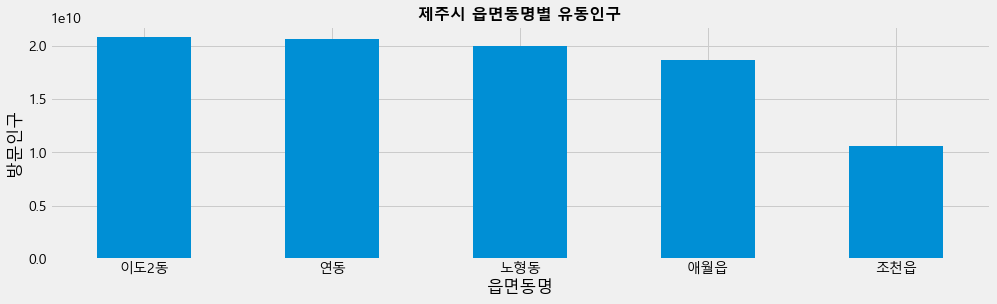

In [79]:
#제주시별 읍면동명별 유동인구 -> 유동인구가 많은 지역을 찾기


print(df_cd.groupby('시도명')['방문인구'].mean()) #시별 유동인구 파악
print()
print(df_cd.groupby(['시도명','읍면동명'])['방문인구'].sum()['제주시'].sort_values(ascending = False).head()) #읍별 유동인구

plt.figure(figsize = (15,4))
plt.grid()
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
    }
plt.ylabel('방문인구')
plt.title('제주시 읍면동명별 유동인구', fontdict = title_font)
a = df_cd.groupby(['시도명','읍면동명'])['방문인구'].sum()['제주시'].sort_values(ascending = False).head()
a.plot(kind = 'bar', rot = 0)

plt.savefig('분석_읍면동명별_유동인구')




In [80]:
df_cd.groupby(['시도명','읍면동명'])['방문인구'].sum()['제주시']

읍면동명
건입동     5149905802.927
구좌읍     6366657863.349
노형동    19956407100.788
도두동     2139135029.482
봉개동     2251119633.240
삼도1동    4743543742.116
삼도2동    4235047767.152
삼양동     3203529479.369
아라동    10400496922.214
애월읍    18672993641.972
연동     20642693754.233
오라동     8991448281.088
외도동     3430603596.277
용담1동    3205929174.045
용담2동    8128243400.912
우도면      693452870.179
이도1동    6220773768.013
이도2동   20822880758.795
이호동     1943970652.876
일도1동    1984961052.405
일도2동    8355763351.044
조천읍    10626189221.789
추자면      447467900.431
한경면     2195536665.578
한림읍     7740524105.045
화북동     6338827396.004
Name: 방문인구, dtype: float64

>제주시에가 유동인구(방문인구)가 서귀포시 보다 높음을 확인했다.    
따라서 제주시를 중심으로 유동인구를 파악하려고 한다.  
제주시에서 유동인구가 가장 많은 곳은 1위부터 5위까지 이도2동 -> 연동 -> 노형동 -> 애월읍 -> 조천읍을 가진다.

In [81]:
#시도명, 읍면동명별 거주인구, 방문인구 오름차순으로 정렬
#유동인구가 많은 지역을 순서대로 뽑기 위함

df_test = df_cd.groupby(['시도명','읍면동명'])['방문인구','거주인구'].sum().reset_index().sort_values(by = '거주인구')
df_test[df_test['시도명']=='제주시'].sort_values(by='방문인구').tail()

<ipython-input-81-cc72aa0754dc>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_test = df_cd.groupby(['시도명','읍면동명'])['방문인구','거주인구'].sum().reset_index().sort_values(by = '거주인구')


,시도명,읍면동명,방문인구,거주인구
38,제주시,조천읍,10626189221.789,15002122317.440
26,제주시,애월읍,18672993641.972,26472590509.395
19,제주시,노형동,19956407100.788,46476980917.721
27,제주시,연동,20642693754.233,39026155725.470
34,제주시,이도2동,20822880758.795,41164715182.980


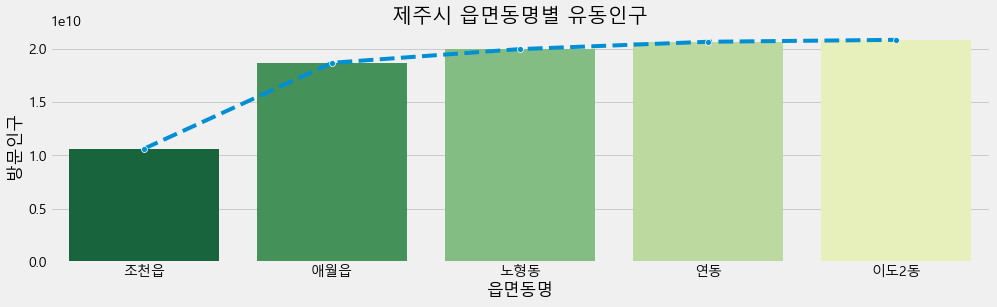

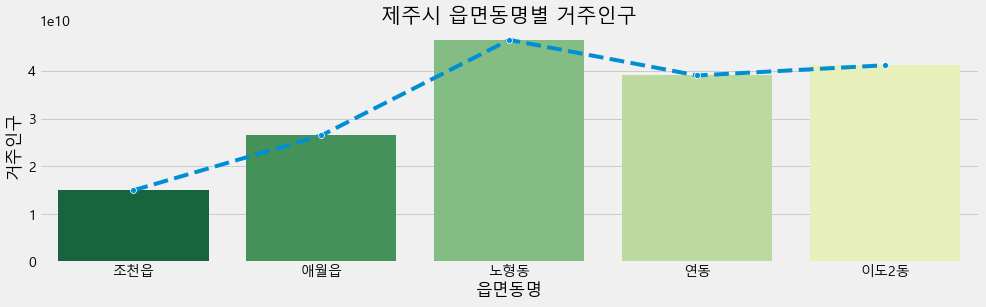

In [82]:
df_test2 = df_test[df_test['시도명']=='제주시'].sort_values(by='방문인구').tail()

plt.figure(figsize = (15,4))
plt.title('제주시 읍면동명별 유동인구')
sns.lineplot(data = df_test2, x = '읍면동명', y = '방문인구', marker = 'o', linestyle = '--')
sns.barplot(data = df_test2, x = '읍면동명', y = '방문인구', palette='YlGn_r')
plt.savefig('분석_읍면동명별_유동인구2')

plt.figure(figsize = (15,4))
plt.title('제주시 읍면동명별 거주인구')
sns.lineplot(data = df_test2, x = '읍면동명', y = '거주인구', marker = 'o', linestyle = '--')
sns.barplot(data = df_test2, x = '읍면동명', y = '거주인구',palette='YlGn_r')
plt.savefig('분석_읍면동명별_거주인구2')

여전히 유동인구 많은지역 top5 그대로 나옴  
다음으로 유동인구가 많은 지역이 매출액이 많은지 파악하기

##### 매출액이 가장 높은 지역들을 찾기

읍면동명
애월읍     204096564498
이도2동    329966773318
노형동     401317593377
용담2동    454993958246
연동      536937434491
Name: 이용금액, dtype: int64


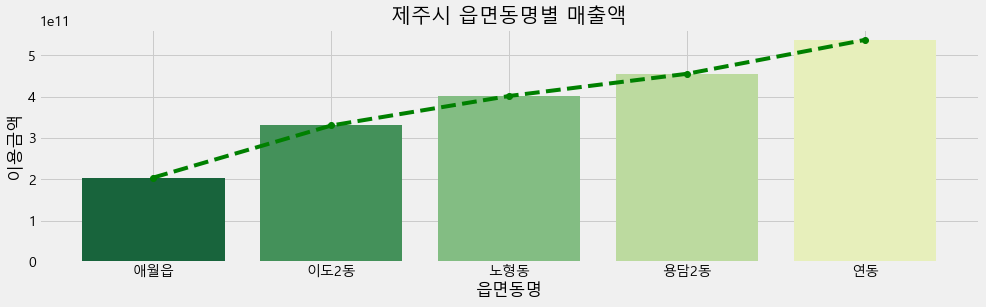

In [83]:
# 시도명, 읍면동명 매출액 합계
# 매출액이 가장 높은 지역들을 찾기 위함

print(df_cd.groupby(['시도명','읍면동명'])['이용금액'].sum()['제주시'].sort_values().tail(5))
plt.figure(figsize = (15,4))
plt.title('제주시 읍면동명별 매출액')
plt.ylabel('이용금액')

df = df_cd.groupby(['시도명','읍면동명'])['이용금액'].sum()['제주시'].sort_values().reset_index().tail(5)

sns.barplot(data = df, x = '읍면동명', y = '이용금액', palette='YlGn_r')
df_cd.groupby(['시도명','읍면동명'])['이용금액'].sum()['제주시'].sort_values().tail(5).plot(linestyle = '--', marker ='o', color = 'green')

# df_cd.groupby(['시도명','읍면동명'])['이용금액'].sum()['제주시'].sort_values().tail(5).plot(kind = 'bar', rot = 0)
plt.savefig('분석_읍면동명별_매출액2')



In [84]:
df

,읍면동명,이용금액
21,애월읍,204096564498
22,이도2동,329966773318
23,노형동,401317593377
24,용담2동,454993958246
25,연동,536937434491


> 이도2동 -> 연동 -> 노형동 -> 애월읍 -> 조천읍 (유동인구 순위)  
연동 -> 용담2동 -> 노형동 -> 이도2동 -> 애월읍 (매출액 순위)  
  

>제주시의 읍면동명별 매출액 순위는 연동 -> 용담동 -> 이도동 -> 노형동 -> 일도동 -> 애월읍 순으로 나온다.  
매출순위와 유동인구가 상관관계가 있는 것으로 보인다.   


##### 유동인구가 많은 지역의 업종 종류와 매출액 찾기

In [85]:
#유동인구가 많은 지역의 업종들에 관한 정보를 얻기 위한 함수

def print_info(dong, job_type):
    df_test2 = df_cd[df_cd['읍면동명'] == dong]
    print('\n\n\n{}의 {} 정보   \n\n\n'.format(dong, job_type))
    print('=================업종별 매장수===============')
    print(df_test2.groupby(['업종 대분류','업종명'])['성별'].count()[job_type])
    print('=============================================')
    print('=================업종별 매출액===============')
    print(df_test2.groupby(['업종 대분류','업종명'])['이용금액'].sum()[job_type].sort_values())
    print('=============================================')
    plt.figure(figsize = (8,5))
    plt.title('업종별 개수')
    df_test2.groupby(['업종 대분류','업종명'])['성별'].count()[job_type].plot(kind = 'barh')
    plt.figure(figsize = (8,5))
    plt.title('업종별 매출액')
    df = df_test2.groupby(['업종 대분류','업종명'])['이용금액'].sum()[job_type].sort_values(ascending = False).reset_index()
    sns.barplot(data = df, x = '이용금액', y = '업종명',palette='YlGn_r')
    

In [86]:
df_cd

,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,연도,월,계절,업종 대분류
0,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업
1,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2017,1,겨울,주류
2,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2017,1,겨울,숙박업
3,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615,2017,1,겨울,기타
4,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615,2017,1,겨울,소매업
...,...,...,...,...,...,...,...,...,...,...,...,...
90538,제주시,화북동,수산물 소매업,여성,2216500,9241265.990,481026.216,2598152.464,2020,4,봄,소매업
90539,제주시,화북동,서양식 음식점업,여성,5374000,9241265.990,481026.216,2598152.464,2020,4,봄,음식점
90540,제주시,화북동,빵 및 과자류 소매업,여성,24042720,9241265.990,481026.216,2598152.464,2020,4,봄,소매업
90541,제주시,화북동,육류 소매업,여성,24474030,9241265.990,481026.216,2598152.464,2020,4,봄,소매업


### 이도2동

##### 강세인 업종 종류 찾기

소매업    871
기타     620
음식점    480
주류     240
운송업     90
숙박업     80
Name: 업종 대분류, dtype: int64


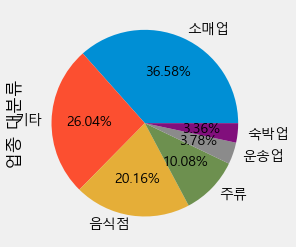

In [87]:
#유동인구가 많은 지역의 주요 업종들 찾기 (이도2동, 연동, 노형동)

df_test2 = df_cd[df_cd['읍면동명'] == '이도2동']
print(df_test2['업종 대분류'].value_counts())
df_test2['업종 대분류'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (15,4))
plt.savefig('분석_이도2동_업종개수')

이도2동 :  소매업 -> 기타 -> 음식점 -> 주류 -> 운송업 -> 숙박업 (매장개수)    
소매업, 기타, 음식점 대분류에서 어떤 업종의 개수가 많은지 파악하려고 함  

##### 소매업(이도2동) 매장 수와 각 매장 매출액




이도2동의 소매업 정보   



=================업종별 매장수===============
업종명
건강보조식품 소매업           80
과실 및 채소 소매업          80
관광 민예품 및 선물용품 소매업    80
그외 기타 종합 소매업         80
기타음식료품위주종합소매업        71
빵 및 과자류 소매업          80
수산물 소매업              80
슈퍼마켓                 80
육류 소매업               80
체인화 편의점              80
화장품 및 방향제 소매업        80
Name: 성별, dtype: int64
=================업종별 매출액===============
업종명
기타음식료품위주종합소매업            7476900
그외 기타 종합 소매업           184722000
관광 민예품 및 선물용품 소매업      447449018
건강보조식품 소매업             675970803
수산물 소매업               1684453663
육류 소매업                4913095917
화장품 및 방향제 소매업         5431072896
빵 및 과자류 소매업           6207369072
과실 및 채소 소매업          10876226329
체인화 편의점              23676747369
슈퍼마켓                 88374451070
Name: 이용금액, dtype: int64


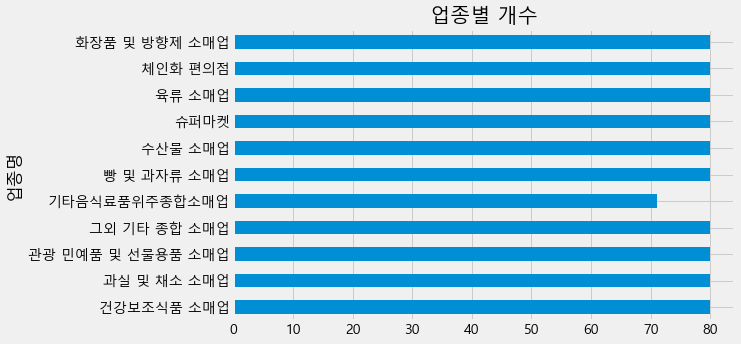

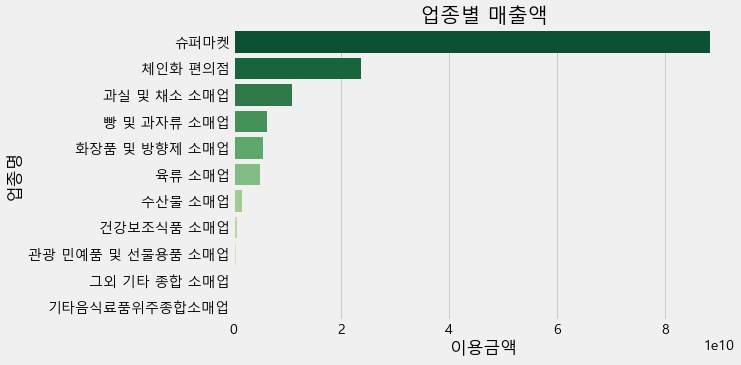

In [88]:
print_info('이도2동','소매업')
plt.savefig('분석_이도2동_업종별매출액2',bbox_inches='tight')

##### 기타(이도2동) 매장 수와 각 매장 매출액




이도2동의 기타 정보   



=================업종별 매장수===============
업종명
그외 기타 스포츠시설 운영업       70
마사지업                  70
스포츠 및 레크레이션 용품 임대업    80
여행사업                  80
욕탕업                   80
전시 및 행사 대행업           80
차량용 가스 충전업            80
차량용 주유소 운영업           80
Name: 성별, dtype: int64
=================업종별 매출액===============
업종명
그외 기타 스포츠시설 운영업          38999800
마사지업                     97667000
욕탕업                     345247675
차량용 가스 충전업              646975660
여행사업                    895522223
전시 및 행사 대행업            1053909870
스포츠 및 레크레이션 용품 임대업     5958699496
차량용 주유소 운영업           20468184060
Name: 이용금액, dtype: int64


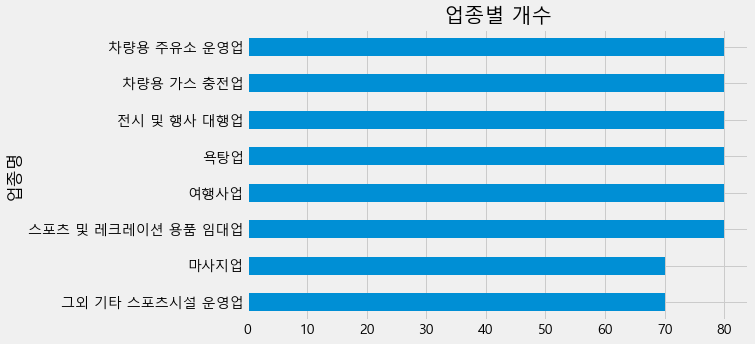

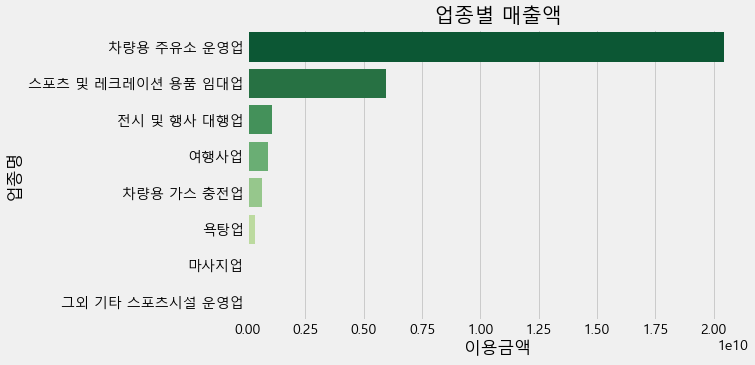

In [89]:
print_info('이도2동','기타')
plt.savefig('분석_이도2동_업종별매출액(기타)2',bbox_inches='tight')

##### 음식점(이도2동) 매장 수와 각 매장 매출액




이도2동의 음식점 정보   



=================업종별 매장수===============
업종명
기타 외국식 음식점업                80
서양식 음식점업                   80
일식 음식점업                    80
중식 음식점업                    80
피자, 햄버거, 샌드위치 및 유사 음식점업    80
한식 음식점업                    80
Name: 성별, dtype: int64
=================업종별 매출액===============
업종명
기타 외국식 음식점업                  2262142745
중식 음식점업                      2990351456
피자, 햄버거, 샌드위치 및 유사 음식점업      7110896599
일식 음식점업                      8017048424
서양식 음식점업                     8584022797
한식 음식점업                    104674676866
Name: 이용금액, dtype: int64


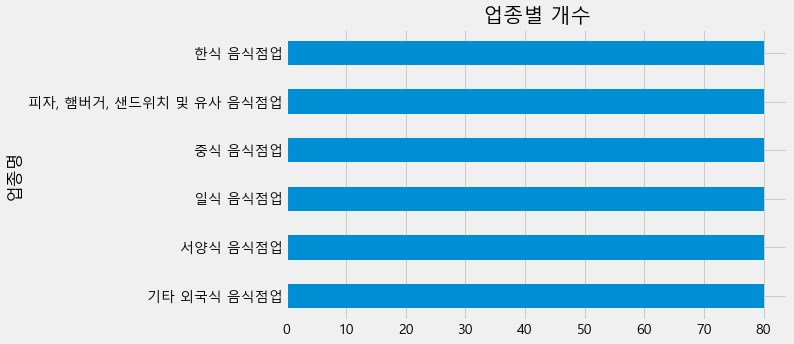

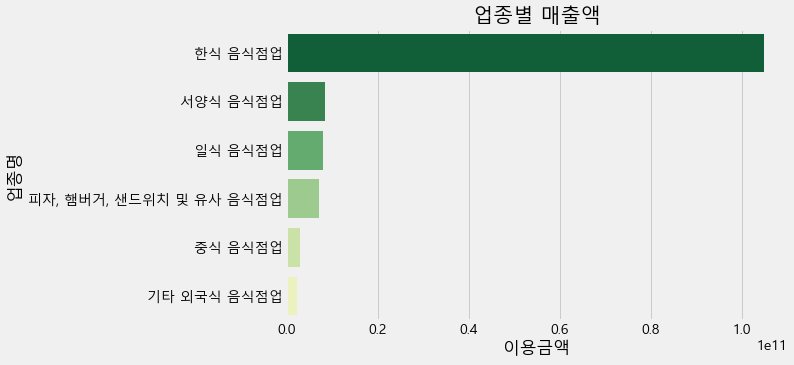

In [90]:
print_info('이도2동','음식점')
plt.savefig('분석_이도2동_업종별매출액(음식)2',bbox_inches='tight')

### 연동

소매업    1029
기타      589
음식점     480
주류      240
숙박업     160
운송업     160
Name: 업종 대분류, dtype: int64


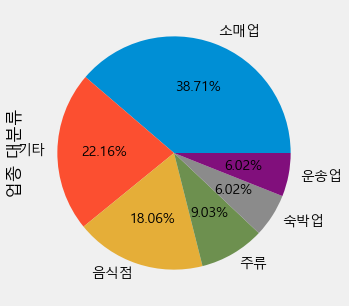

In [91]:
#유동인구가 많은 지역의 주요 업종들 찾기 (이도2동, 연동, 노형동)

df_test2 = df_cd[df_cd['읍면동명'] == '연동']
print(df_test2['업종 대분류'].value_counts())
plt.figure(figsize = (10,5))
df_test2['업종 대분류'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.savefig('분석_연동_업종개수')

##### 소매업(이도2동) 매장 수와 각 매장 매출액




연동의 소매업 정보   



=================업종별 매장수===============
업종명
건강보조식품 소매업           80
과실 및 채소 소매업          80
관광 민예품 및 선물용품 소매업    80
그외 기타 종합 소매업         79
기타 대형 종합 소매업         72
기타음식료품위주종합소매업        78
면세점                  80
빵 및 과자류 소매업          80
수산물 소매업              80
슈퍼마켓                 80
육류 소매업               80
체인화 편의점              80
화장품 및 방향제 소매업        80
Name: 성별, dtype: int64
=================업종별 매출액===============
업종명
기타음식료품위주종합소매업           75189220
그외 기타 종합 소매업           159655000
건강보조식품 소매업             849682725
육류 소매업                1317472115
과실 및 채소 소매업           1575805530
수산물 소매업               1671168432
면세점                   1730783372
관광 민예품 및 선물용품 소매업     1927054434
화장품 및 방향제 소매업         6445894062
빵 및 과자류 소매업           6472918440
기타 대형 종합 소매업          7649775341
체인화 편의점              31027236245
슈퍼마켓                 35814058619
Name: 이용금액, dtype: int64


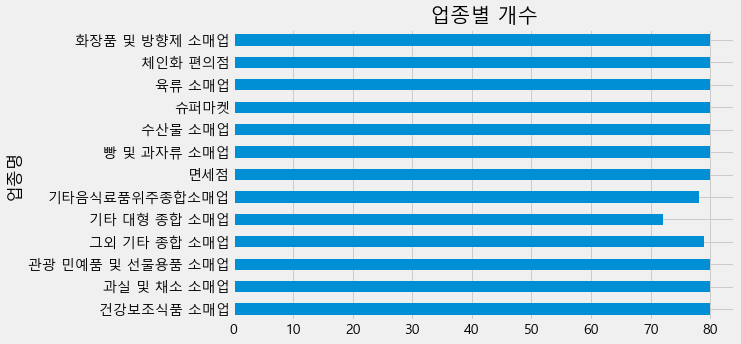

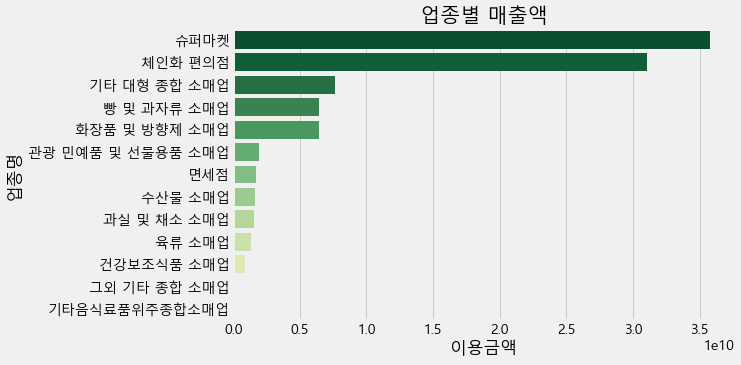

In [92]:
print_info('연동','소매업')
plt.savefig('분석_연동_업종별매출액(소매)2',bbox_inches='tight')

##### 기타(연동) 매장 수와 각 매장 매출액




연동의 기타 정보   



=================업종별 매장수===============
업종명
골프장 운영업               28
그외 기타 스포츠시설 운영업        1
마사지업                  80
스포츠 및 레크레이션 용품 임대업    80
여행사업                  80
욕탕업                   80
전시 및 행사 대행업           80
차량용 가스 충전업            80
차량용 주유소 운영업           80
Name: 성별, dtype: int64
=================업종별 매출액===============
업종명
그외 기타 스포츠시설 운영업             60000
차량용 가스 충전업               88522190
마사지업                    265305720
전시 및 행사 대행업             976340800
골프장 운영업                1108378550
여행사업                   1390926216
욕탕업                    1476464646
차량용 주유소 운영업           16604709217
스포츠 및 레크레이션 용품 임대업    24223284699
Name: 이용금액, dtype: int64


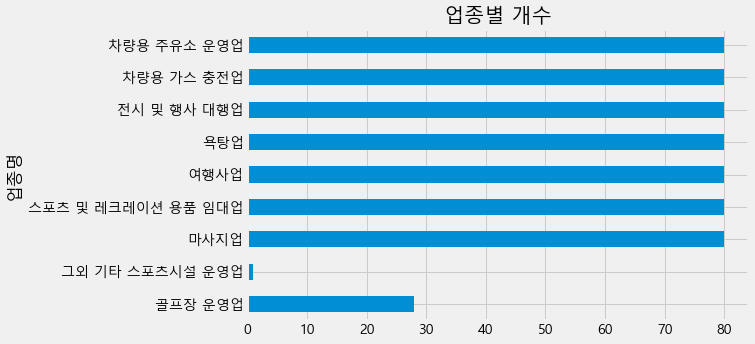

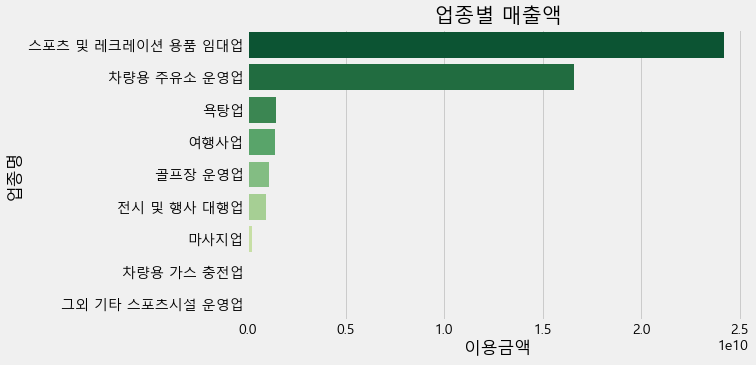

In [93]:
print_info('연동','기타')
plt.savefig('분석_연동_업종별매출액(기타)2',bbox_inches='tight')

##### 음식점(연동) 매장 수와 각 매장 매출액




연동의 음식점 정보   



=================업종별 매장수===============
업종명
기타 외국식 음식점업                80
서양식 음식점업                   80
일식 음식점업                    80
중식 음식점업                    80
피자, 햄버거, 샌드위치 및 유사 음식점업    80
한식 음식점업                    80
Name: 성별, dtype: int64
=================업종별 매출액===============
업종명
피자, 햄버거, 샌드위치 및 유사 음식점업      1667470637
기타 외국식 음식점업                  3404321768
중식 음식점업                      6030765324
일식 음식점업                      9360555551
서양식 음식점업                    11945547771
한식 음식점업                    109972254133
Name: 이용금액, dtype: int64


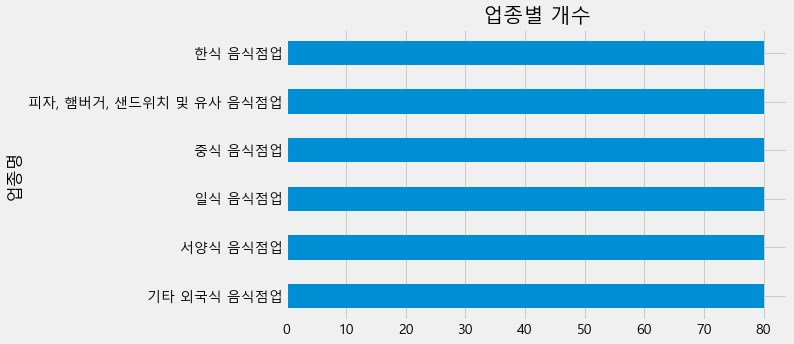

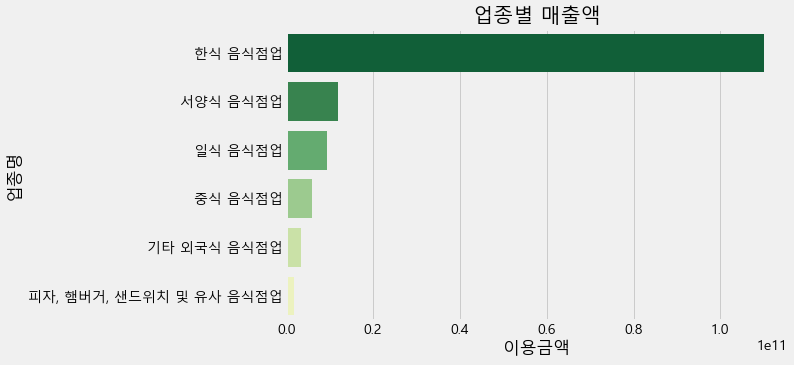

In [94]:
print_info('연동','음식점')
plt.savefig('분석_연동_업종별매출액(음식)2',bbox_inches='tight')

### 노형동

소매업     960
기타      632
음식점     480
주류      240
숙박업     220
서비스업     80
운송업      80
Name: 업종 대분류, dtype: int64


<AxesSubplot:ylabel='업종 대분류'>

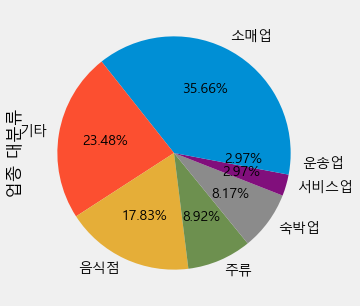

In [95]:
#유동인구가 많은 지역의 주요 업종들 찾기 (이도2동, 연동, 노형동)

df_test2 = df_cd[df_cd['읍면동명'] == '노형동']
print(df_test2['업종 대분류'].value_counts())
plt.figure(figsize = (10,5))
df_test2['업종 대분류'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')


##### 소매업(노형동) 매장 수와 각 매장 매출액

In [96]:
print_graph('노형동', '소매업')

NameError: name 'print_graph' is not defined

##### 기타(노형동) 매장 수와 각 매장 매출액

In [ ]:
print_graph('노형동', '기타')

##### 음식점(노형동) 매장 수와 각 매장 매출액

In [ ]:
print_info('노형동', '음식점')

In [ ]:
print_info('애월읍','음식점')

### 애월읍

In [ ]:
#유동인구가 많은 지역의 주요 업종들 찾기 (이도2동, 연동, 노형동)

df_test2 = df_cd[df_cd['읍면동명'] == '노형동']
print(df_test2['업종 대분류'].value_counts())
plt.figure(figsize = (10,5))
df_test2['업종 대분류'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.savefig('분석_애월_업종개수')

In [ ]:
print_info('애월읍','소매업')
plt.savefig('분석_애월_업종별매출액(소매)2',bbox_inches='tight')

In [ ]:
print_info('애월읍','기타')
plt.savefig('분석_애월_업종별매출액(기타)2',bbox_inches='tight')

In [ ]:
print_info('애월읍','음식점')
plt.savefig('분석_애월_업종별매출액(음식점)2',bbox_inches='tight')

먼저 한식은 매번 많이 크기가 크게 나와서 제외시켰다.  
따라서 애월읍에서 한식 제외하고 음식점들을 찾아봤을 때 서양식 음식점업이 가장 매출이 크게 나왔다.  
유동인구가 많은 동들 중에서 서양식 음식점의 매출액을 그래프로 그려보니 4개의동 중에서 가장 큰 매출을 보이고 있다.  

(조원들에게 애월읍의 유동인구 중에서 외국인들 비율이 어느정돈지 알아볼 수 있는지 물어보자)  




In [ ]:
df_food_test = df_cd[(df_cd['업종명'] == '서양식 음식점업') & (df_cd['읍면동명'] == '애월읍')]
df_food_test2 = df_cd[(df_cd['업종명'] == '서양식 음식점업') & (df_cd['읍면동명'] == '이도2동')]
df_food_test3 = df_cd[(df_cd['업종명'] == '서양식 음식점업') & (df_cd['읍면동명'] == '노형동')]
df_food_test4 = df_cd[(df_cd['업종명'] == '서양식 음식점업') & (df_cd['읍면동명'] == '연동')]



western_food = {'애월읍' : df_food_test['이용금액'].sum(), '이도2동' : df_food_test2['이용금액'].sum(),
                '노형동' : df_food_test3['이용금액'].sum(), '연동' : df_food_test4['이용금액'].sum()

} 


title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
    }

test_series = pd.Series(data = western_food.values(), index = western_food.keys())
plt.title('유동인구 많은 시별 서양음식집 매출액 비교',fontdict = title_font)
plt.style.use('ggplot')
test_series.plot(kind = 'bar')

In [ ]:
df_test =  df_cd[df_cd['업종명'] == '스포츠 및 레크레이션 용품 임대업']
df_test

In [ ]:
# df_test[df_test['읍면동명'] == '애월읍'] #80개
# df_test[df_test['읍면동명'] == '이도2동'] #80개
df_test[df_test['읍면동명'] == '연동'] #80개

In [ ]:
western_food.keys()

1. 시별, 읍면동명별 유동인구를 분석한 결과

=> "가설 : 유동인구가 많은 지역은 매출액이 많은 지역이다." 를 증명하는 것을 목적으로 분석을 진행  
=> 유동인구가 가장 많은 지역을 탐색해봤더니 "이도2동 -> 연동 -> 노형동" 순이다.  
=> 매출액이 많은 순위로 지역을 탐색해봤더니 "연동 -> 용담2동 -> 노형동" 순이다.  
=> 위의 분석을 통해서 유동인구와 매출액은 어느 정도 상관관계가 있구나를 파악했다.  
=> 따라서 유동인구가 많은 지역은 매출액이 많은 지역임을 True 로 생각하고 분석을 진행  
  
=> 유동인구가 많은 지역 "이도2동, 연동, 노형동" 을 중심으로 업종 분석을 진행  
=> 각각의 지역에서 어떤 업종이 매출액에 많은 기여를 하는지 탐색  
=> 최종적으로 각각의 세 지역은 모두 "소매업, 기타업, 음식업" 이 가장 많은 매출을 기록하고 있음  

=> 각 지역의 소매업, 기타업, 음식점 중에서 어떤 업종을 추천해줄지 고민 중. (지역지리와의 관계 파악 등등)  
=> 이도2동, 연동, 노형동 같은 경우는 주민들이 사는 지역들로 관광지가 아님, 관광지 특화 지역의 매출액을 파악할 필요가 있어보임     
                          ㄴ> 따라서 애월읍을 생각 중  



### 1.3.2 계절별 유동인구

In [ ]:
df_cd.head()

In [ ]:
#계절별 유동인구 그룹바이

df_cd.groupby('계절')['방문인구'].sum()

In [ ]:
df_cd.groupby('계절')['방문인구'].sum().plot(kind = 'bar')

##### 봄

In [ ]:
df_spring = df_cd[df_cd['계절']=='봄']
df_spring.groupby(['업종 대분류','업종명'])[['이용금액']].sum().sort_values(by = '이용금액').tail()

##### 여름

In [ ]:
df_summer = df_cd[df_cd['계절']=='여름']
df_summer.groupby(['업종 대분류','업종명'])[['이용금액']].sum().sort_values(by = '이용금액').tail()

##### 가을

In [ ]:
df_summer = df_cd[df_cd['계절']=='가을']
df_summer.groupby(['업종 대분류','업종명'])[['이용금액']].sum().sort_values(by = '이용금액').tail()

##### 겨울

In [ ]:
df_summer = df_cd[df_cd['계절']=='겨울']
df_summer.groupby(['업종 대분류','업종명'])[['이용금액']].sum().sort_values(by = '이용금액').tail()

> 봄에 가장 많은 유동인구를 가지고 있음, 따라서 봄을 위주로 분석

In [ ]:
plt.figure(figsize = (10,5))
plt.title('봄, 업종별 이용금액')
sns.lineplot(data = df_spring, x = '업종 대분류', y = '이용금액',ci = None)

In [ ]:
df_test3 = df_cd[(df_cd['시도명']=='제주시') & (df_cd['계절'] == '여름') & (df_cd['읍면동명'] == '애월읍')]

In [ ]:
df_test3.groupby('업종명')[['이용금액']].sum().sort_values(by = '이용금액').tail()

유동인구가 적은 곳이랑 비교해서 시각화  
시각화 작업하고 4시까지  

## 1.4 성별 업종 매출액 파악

In [ ]:
df_cd.groupby(['성별'])['이용금액'].sum().plot(kind='pie')

In [ ]:
df_male = df_cd[df_cd['성별'] == '남성']
df_male.groupby(['업종 대분류','업종명'])[['이용금액']].sum().sort_values(by = '이용금액', ascending = False)
#sort_valaus -> series , 꺽새 -> 데이터프레임으로 반환



In [ ]:
df_male = df_cd[df_cd['성별'] == '여성']
df_male.groupby(['업종 대분류','업종명'])[['이용금액']].sum().sort_values(by = '이용금액', ascending = False)
#sort_valaus -> series , 꺽새 -> 데이터프레임으로 반환



성별로 업종 이용금액을 따졌더니, 업종 순위가 다르게 나옴 (ex, 주류)

오늘 할거 : 

1. 계절별 유동인구 분석  
2. 